# Assignment 2 
## GENDER INCOME GAP
you may know that it is estimated that women earn about 78% of men in the same job position. Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)

In [41]:
from __future__ import print_function, division
__author__='Shalmali'

import os
import numpy as np
import matplotlib.pylab as pl
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pandas.tools.plotting import scatter_matrix  # for plotting the matrix
import scipy.stats as stats

import sys
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [42]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"
#split your data by male and female, load the data into 2 dictionary. 
# 08_2 files are male, 08_3 are female, 

In [43]:
# reading required data files 
allmales={}
allfemales={}   # dictionary for males and females.
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)   #%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [44]:
allmales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706.0,4407.0,2665.0,3200.0,4027.0,4418.0,3333.0,5027.0,3807.0,...,513.0,626.0,457.0,12003.0,35228,211,50779,447,0.501,0.0033
2,Earnings,83555.0,3217.0,2326.0,2560.0,1964.0,3118.0,1505.0,3451.0,1959.0,...,246.0,559.0,259.0,10113.0,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263.0,2779.0,2184.0,2419.0,1780.0,2777.0,1365.0,3149.0,1847.0,...,244.0,540.0,257.0,9392.0,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014.0,1478.0,280.0,342.0,231.0,556.0,144.0,377.0,122.0,...,0.0,18.0,0.0,516.0,19557,1391,34247,1291,0.63,0.0092


In [46]:
allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [47]:
#The datatype of some columns is object, which should be actually float
allmales['all'].dtypes

Characteristic           object
Total with Income       float64
$1 to $2,499 or loss    float64
$2,500 to $4,999        float64
$5,000 to $7,499        float64
$7,500 to $9,999        float64
$10,000 to $12,499      float64
$12,500 to $14,999      float64
$15,000 to $17,499      float64
$17,500 to $19,999      float64
$20,000 to $22,499      float64
$22,500 to $24,999      float64
$25,000 to $27,499      float64
$27,500 to $29,999      float64
$30,000 to $32,499      float64
$32,500 to $34,999      float64
$35,000 to $37,499      float64
$37,500 to $39,999      float64
$40,000 to $42,499      float64
$42,500 to $44,999      float64
$45,000 to $47,499      float64
$47,500 to $49,999      float64
$50,000 to $52,499      float64
$52,500 to $54,999      float64
$55,000 to $57,499      float64
$57,500 to $59,999      float64
$60,000 to $62,499      float64
$62,500 to $64,999      float64
$65,000 to $67,499      float64
$67,500 to $69,999      float64
$70,000 to $72,499      float64
$72,500 

In [48]:
## Used the np.isreal command to remove non real entries and astype to convert the 'object' type to 'float' as per Dr. Bianco's notebook

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float) 

/Users/Shalmali/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
allmales['all'].dtypes   #all datatypes are float64 

Characteristic           object
Total with Income       float64
$1 to $2,499 or loss    float64
$2,500 to $4,999        float64
$5,000 to $7,499        float64
$7,500 to $9,999        float64
$10,000 to $12,499      float64
$12,500 to $14,999      float64
$15,000 to $17,499      float64
$17,500 to $19,999      float64
$20,000 to $22,499      float64
$22,500 to $24,999      float64
$25,000 to $27,499      float64
$27,500 to $29,999      float64
$30,000 to $32,499      float64
$32,500 to $34,999      float64
$35,000 to $37,499      float64
$37,500 to $39,999      float64
$40,000 to $42,499      float64
$42,500 to $44,999      float64
$45,000 to $47,499      float64
$47,500 to $49,999      float64
$50,000 to $52,499      float64
$52,500 to $54,999      float64
$55,000 to $57,499      float64
$57,500 to $59,999      float64
$60,000 to $62,499      float64
$62,500 to $64,999      float64
$65,000 to $67,499      float64
$67,500 to $69,999      float64
$70,000 to $72,499      float64
$72,500 

In [50]:
## Do the same for females.

for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/Users/Shalmali/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Descriptive phase:

In [51]:
# Description of Data using describe function
for k,v in allfemales.items():
    print("Female", k)
    print(v.describe())
for k,v in allmales.items():
    print("Male", k)
    print(v.describe())

Female hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN     

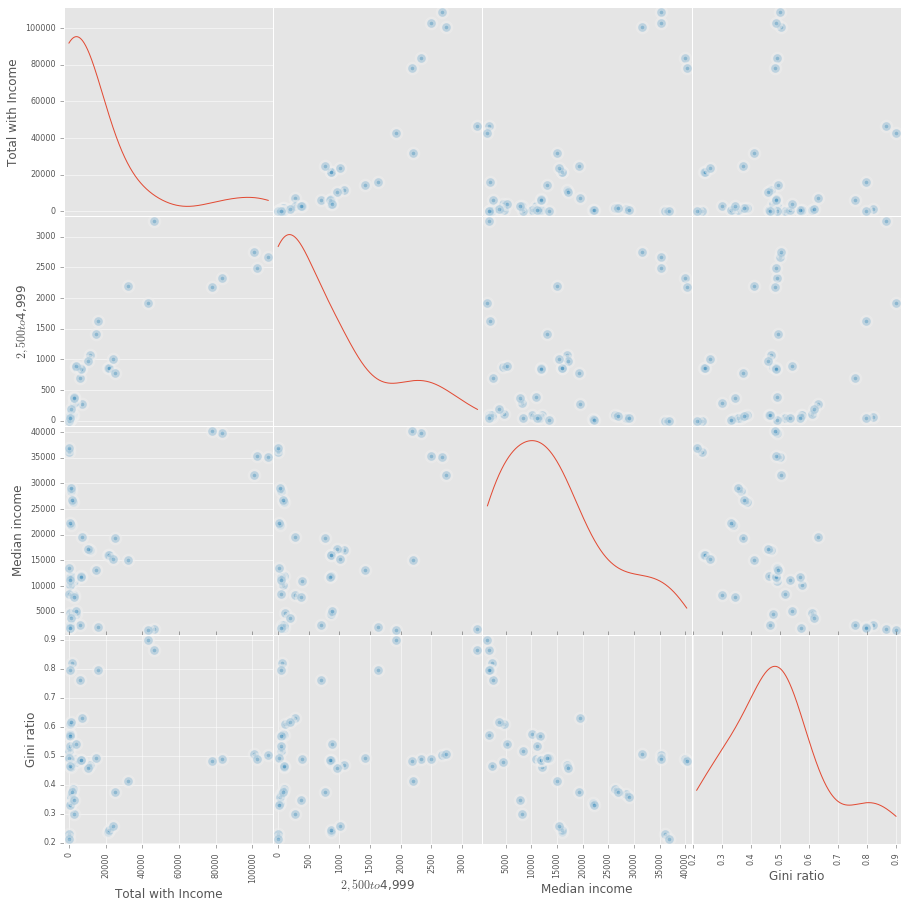

In [52]:
#Plotting the scatter matrix for allmales
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 5, s=300, figsize=(15,15), 
                        diagonal='kde')

### Figure 1: Scatter Matrix shows the relationship between various income sources for males of all ethnicities, the diagonal garphs are the density distributions.

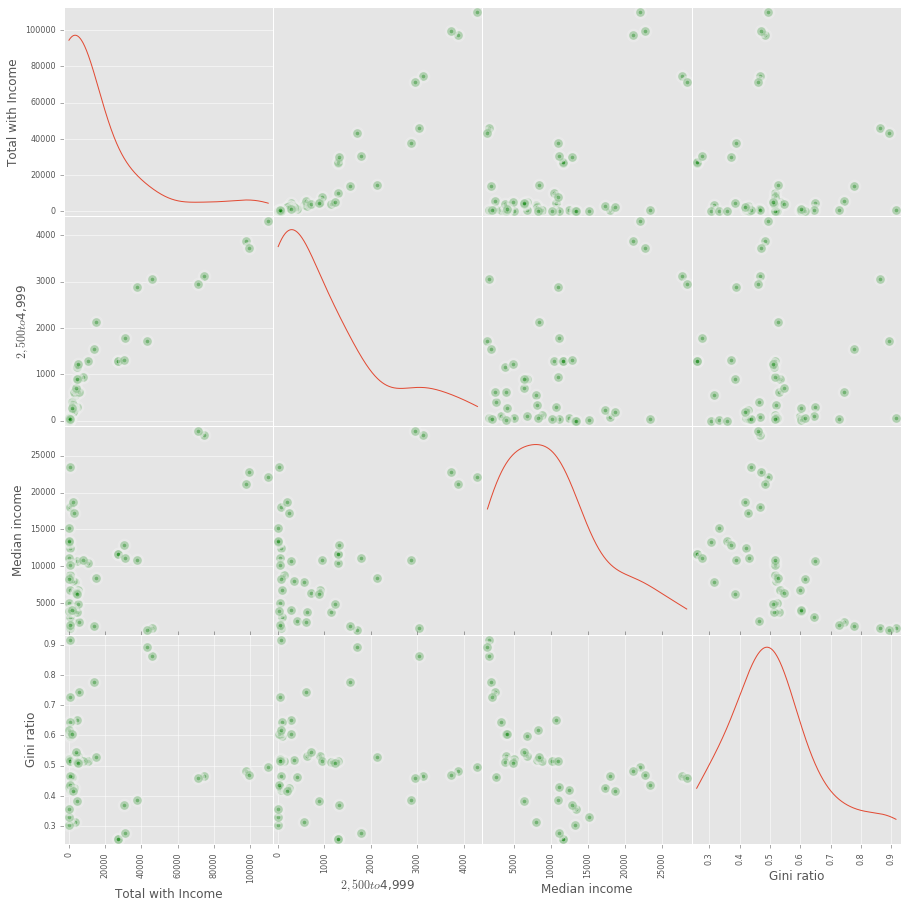

In [53]:
#Plotting the scatter matrix for allfemales
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 5, s=300, figsize=(15,15), 
                        diagonal='kde', c = 'g') 

### Figure 2: Scatter Matrix shows the relationship between various income sources for females of all ethnicities, the diagonal garphs are the density distributions.

In [54]:
allmales['all'][u'Median income'][1]

35228.0

Races are :  ['hispanic', 'all', 'black', 'white', 'asian']
Medium Incomes Male :  [25411.0, 35228.0, 24855.0, 40122.0, 40153.0]
Medium Incomes Female :  [17762.0, 22063.0, 20044.0, 23780.0, 24840.0]


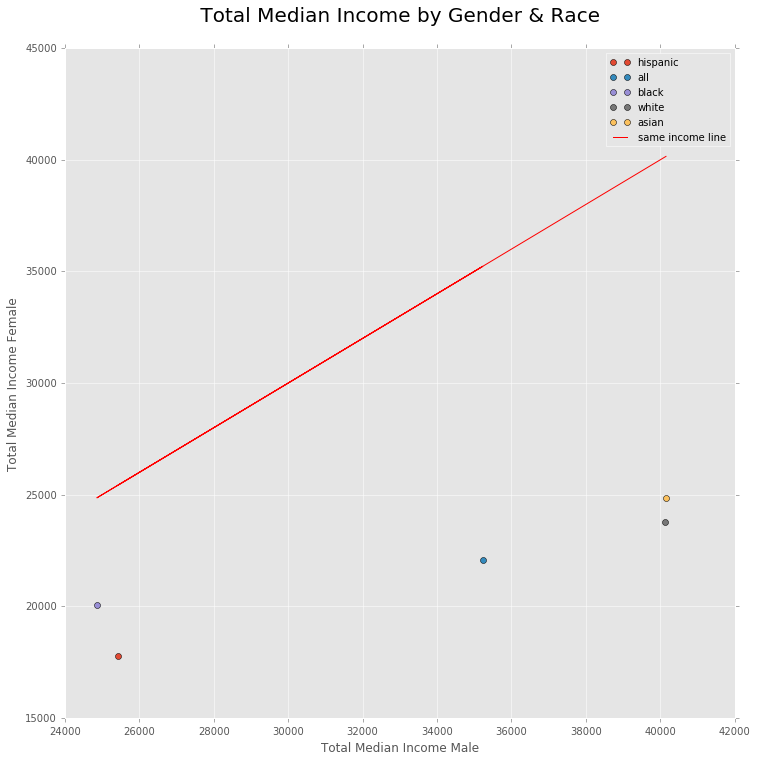

In [55]:
##plotting the Total median incame by race
##pl.scatter...
plt.figure(figsize=(12,12))
Med_incomesM= []
Med_incomesF= []
for i in range(5): 
    y = allmales.items()[i][1][u'Median income'][1]
    x = allfemales.items()[i][1][u'Median income'][1]
    pl.plot(y,x, 'o', label = allmales.items()[i][0])
    Med_incomesF.append(x)
    Med_incomesM.append(y)
    
print("Races are : ", allmales.keys())            
print('Medium Incomes Male : ', Med_incomesM)
print('Medium Incomes Female : ', Med_incomesF)

pl.xlabel("Total Median Income Male")
pl.ylabel("Total Median Income Female")
pl.title(" Total Median Income by Gender & Race \n", size = 20)
pl.plot(Med_incomesM,Med_incomesM, label='same income line', c = 'red')
pl.legend(loc = 'best', fontsize = 10)

### Figure 3: Total Median Income by Gender and Race
**The line represents the equal incomes for males & females, all points are below the line which indicates that males have more income than females. There is a gender bias in Median Income**

Regression Coefficients :
Predicted values by Regression Model :  [ 16322.03580834  22627.70758554  15964.90496306  25771.22981001
  25791.1417816 ]
Co-efficient of X by Regression Model :  [ 0.64232166]
Results: LinregressResult(slope=0.35314068346940902, intercept=9989.8444083919057, rvalue=0.93982358317844372, pvalue=0.017559570692699086, stderr=0.07411994131634865)


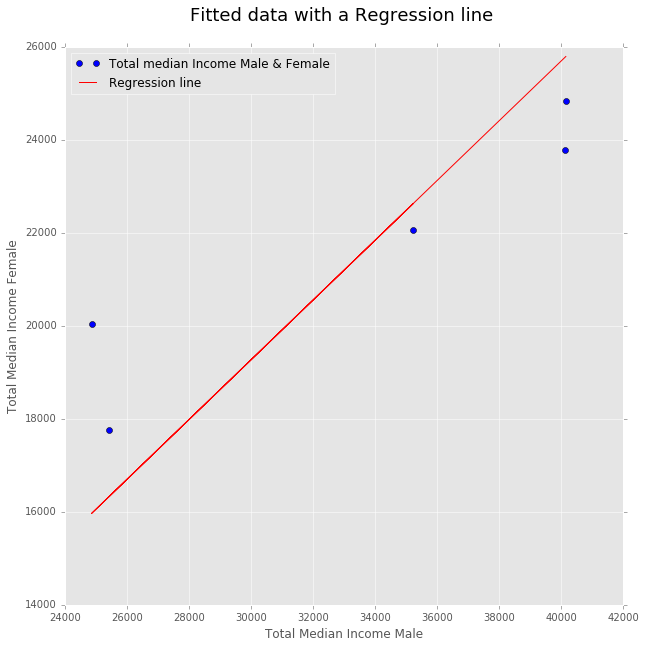

In [57]:
#Using OLS regression model to fit the data
regress_model = sm.OLS(np.array(Med_incomesF), np.array(Med_incomesM)).fit()  

print ('Regression Coefficients :')
print("Predicted values by Regression Model : ", regress_model.predict())
print("Co-efficient of X by Regression Model : ", regress_model.params)
print("Results:",stats.linregress(Med_incomesM, Med_incomesF)) #gives you slope, intercept, r^2value

# plot the regression line by OLS
plt.figure(figsize=(10,10))
pl.plot(Med_incomesM, Med_incomesF, 'bo', label = 'Total median Income Male & Female')
pl.plot(Med_incomesM, regress_model.predict(), 'r-', label = 'Regression line')
pl.xlabel("Total Median Income Male")
pl.ylabel("Total Median Income Female")
pl.title("Fitted data with a Regression line \n", size = 18)
pl.legend(loc = 'best', fontsize = 12)

### Figure 4: Total Median Income by Gender with Regression line
The Regression line fits the data better than the same income line but still shows a bias in Median income, as the points between 35000 - 42000 income are below the regression line indicating males receive more income than females. 

In [58]:
regress_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     395.4
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.77e-05
Time:                        09:58:31   Log-Likelihood:                -45.545
No. Observations:                   5   AIC:                             93.09
Df Residuals:                       4   BIC:                             92.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6423      0.032     19.885      0.000         0.553     0.732
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.657
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.564
Skew:                           0.680   Prob(JB):                        0.754
Kurtosis:                       2.072   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# cell from Dr. Bianco's notebook for Analytical Solution 

all_males=np.array([allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(10485.951073192851, 0.33817688852581446)

Using Formula for calulating 
y = w0 + w1*x

w1 = corr[X,Y]*(std(Y)/std(X))

w0 = E[Y] - E[X]*w1

In [60]:
print ('Equation of line: y = ' + str(beta0) + ' + ' + str(beta1) + ' * x')

Equation of line: y = 10485.9510732 + 0.338176888526 * x


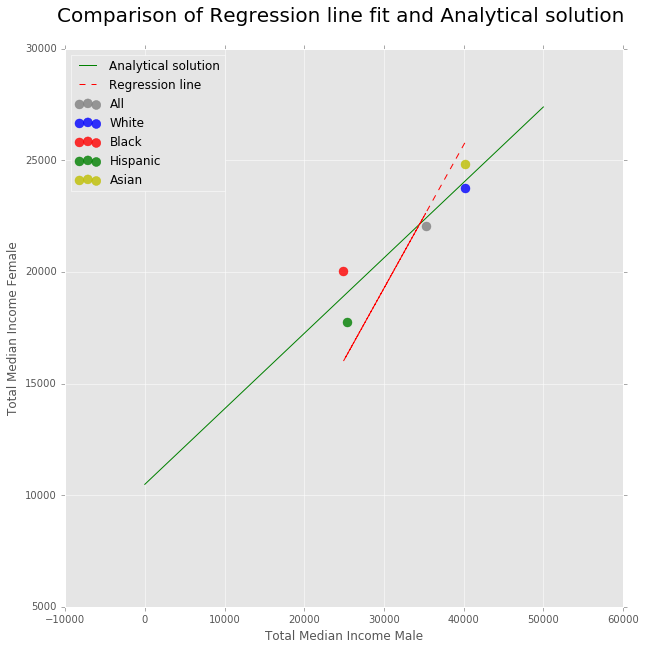

In [61]:
myseed = np.random.seed(50000)
x = np.arange (0,50000, 1)

# define a line function 
def line (xx, a, b):
    return a*(xx) + b

line_ana = line(x, beta1, beta0)

plt.figure(figsize=(10,10))
#pl.scatter(all_males, all_females, label = 'Total median Income by Gender')
pl.scatter(Med_incomesM[1], Med_incomesF[1],alpha=.8, s=80,color = 'grey', label='All')
pl.scatter(Med_incomesM[3], Med_incomesF[3],alpha=.8, s=80,color = 'b', label='White')
pl.scatter(Med_incomesM[2], Med_incomesF[2],alpha=.8, s=80,color = 'r', label='Black')
pl.scatter(Med_incomesM[0], Med_incomesF[0],alpha=.8, s=80,color = 'g', label='Hispanic')
pl.scatter(Med_incomesM[4], Med_incomesF[4],alpha=.8, s=80,color = 'y', label='Asian')
pl.plot(line_ana, 'g-', lw = 1, label = "Analytical solution")
pl.plot(Med_incomesM, regress_model.predict(), 'r--', lw = 1, label = 'Regression line')
pl.xlabel("Total Median Income Male")
pl.ylabel("Total Median Income Female")
pl.title("Comparison of Regression line fit and Analytical solution \n", size= 20)
pl.legend(loc = 'best',fontsize=12)

### Figure 5: Total Median Income Regression fit and Analytical fit by Gender 
let's now see if all forms of income lead to a different fit

Results  LinregressResult(slope=0.60902052361748882, intercept=1493.0394411446359, rvalue=0.92699005065813234, pvalue=7.2128502068483759e-77, stderr=0.018575105164838207)
beat0:  1293.76404877
beta1:  0.62234483904
Equation of analytical sol line: y = 1293.76404877 + 0.62234483904 * x


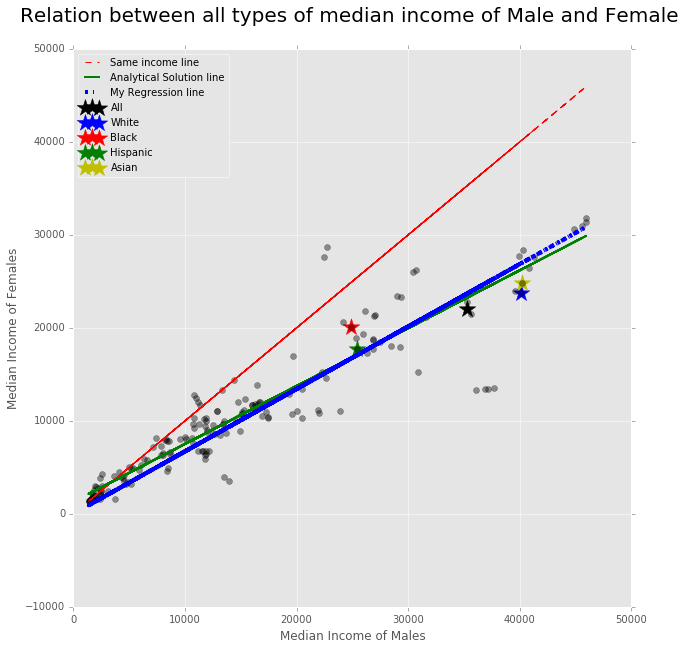

In [63]:
#Comparison of all type of median income of MAle and Female
all_males_allincomes = []
all_females_allincomes = []
pl.figure(figsize = (10,10))

for i in range(5): 
    m = allmales.items()[i][1][u'Median income'][:].values
    f = allfemales.items()[i][1][u'Median income'][:].values
    mask = ~(np.isnan(m) + np.isnan(f))
    pl.plot(m[mask],f[mask], 'o', c='k',alpha=0.4)
    all_males_allincomes.extend(m[mask])
    all_females_allincomes.extend(f[mask])
    
#scatter plot of median income 
pl.scatter(Med_incomesM[1], Med_incomesF[1],marker='*',s=300, color = 'k', label='All')
pl.scatter(Med_incomesM[3], Med_incomesF[3],marker='*',s=300, color = 'b', label='White')
pl.scatter(Med_incomesM[2], Med_incomesF[2],marker='*',s=300, color = 'r', label='Black')
pl.scatter(Med_incomesM[0], Med_incomesF[0],marker='*', s=300, color = 'g', label='Hispanic')
pl.scatter(Med_incomesM[4], Med_incomesF[4],marker='*',s=300, color = 'y', label='Asian')

#OLS Regression line
regress1 = sm.OLS(all_females_allincomes, all_males_allincomes).fit()
print("Results ",stats.linregress(all_males_allincomes,all_females_allincomes))


#Analytical solution    
all_males_allincomes= np.array(all_males_allincomes)
all_females_allincomes = np.array(all_females_allincomes)
cor = stats.spearmanr(all_males_allincomes, all_females_allincomes)
beta1 = cor[0] * all_females_allincomes.std() / all_males_allincomes.std()
beta0 = all_females_allincomes.mean() - beta1 * all_males_allincomes.mean()
print("beat0: ", beta0)
print("beta1: ", beta1)

ana_line = beta0 + (beta1 * all_males_allincomes)
print ('Equation of analytical sol line: y = ' + str(beta0) + ' + ' + str(beta1) + ' * x')

#Plotting all the solutions
pl.xlim(0,50000)
pl.xlabel("Median Income of Males")
pl.ylabel("Median Income of Females")
pl.title("Relation between all types of median income of Male and Female \n", size = 20)
pl.plot(all_males_allincomes,all_males_allincomes,'r--',label='Same income line',lw=1)
pl.plot(all_males_allincomes, ana_line, lw = 2,c='g', label = "Analytical Solution line")
pl.plot(all_males_allincomes, regress1.predict(),'b-.', label = 'My Regression line',lw=4)
pl.legend(loc = 'best', fontsize = 10)

### Figure 6: Comparison between median Income of male and female (of all race) and plotted lines with different solutions

It can be observed from the plot that the linear regression line fit (numerical solution) is almost similar to the analytical solution. There are  minor differences in the lines which could be possibly due to numerical errors or calculation processes. 

## 6. PREDICTION

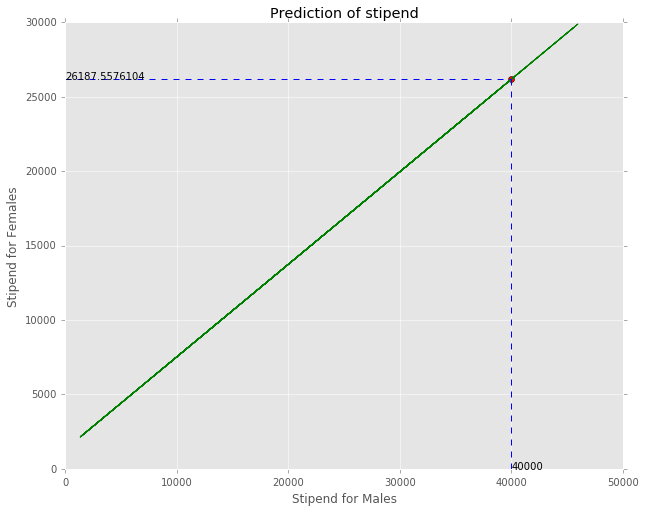

In [64]:
# ideal stipend selected is $ 40000
x = 40000
y = beta0 + beta1 * x
pl.figure(figsize = (10,8))
plt.plot(x,y, 'or')
plt.plot(all_males_allincomes, ana_line, '-g')
plt.plot([0,x], [y,y], '--b')
plt.plot([x,x], [0,y], '--b')
plt.text(x, 0, x)
plt.text(0, y, y)
plt.legend(loc = 'best', fontsize = 10)
plt.xlabel('Stipend for Males')
plt.ylabel('Stipend for Females')
plt.title('Prediction of stipend')

### Figure 7: Stipend Prediction for women 

In [65]:
print ("For 40000 dollars in stipend that a man makes, a woman can expect to receive", y ,"dollars")

For 40000 dollars in stipend that a man makes, a woman can expect to receive 26187.5576104 dollars


In [66]:
for k in allmales:
    print(str(k) + '_Males: ' + str(allmales[k]['Median income'][1]))    

print('\n')
    
for k in allfemales:
    print(str(k) + '_Females: ' + str(allfemales[k]['Median income'][1]))

hispanic_Males: 25411.0
all_Males: 35228.0
black_Males: 24855.0
white_Males: 40122.0
asian_Males: 40153.0


hispanic_Females: 17762.0
all_Females: 22063.0
black_Females: 20044.0
white_Females: 23780.0
asian_Females: 24840.0


**It can be observed from above that**

**Males_median: Asian > White > Hispanic > Black**

**Females Median: Asian > White > Black > Hispanic**

As we have considered the total median income instead of mean it gives better understanding as mean can be influenced by the outliers. Hence using median is definetly a better choice in this case. 

It can be seen that there are inconsistancies in income level by race. There could be inherent biases in the data which would require additional paramenters to analyse and understand the income spread across gender and race. 
We could possiblily use socieconomic characterstics, wages, employment data, etc to understand the income distribution over race and gender. 